In [2]:
# Dependencies and Setup *******Review before final presentation and remove what is not needed ************
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from datetime import date
from functools import reduce
import json
import ctypes
import seaborn as sns
import datetime
import gmaps
from config import g_key
import seaborn as sns
import datetime

In [3]:
# Input File (CSV)
input_data_file = "output_data/agency_crimes_age.csv"

# Export file as a CSV
agency_crimes_age = pd.read_csv(input_data_file)
agency_crimes_age.dropna(inplace = True)
agency_crimes_age.reset_index(drop=True)

,year,crime_type,agency,agency_name,county,state,state_name,latitude,longitude,total_crimes,offender_age,nbr_of_crimes
0,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,0-9,2
1,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,10-19,73
2,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,20-29,151
3,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,30-39,89
4,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,40-49,67
...,...,...,...,...,...,...,...,...,...,...,...,...
128167,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,60-69,1
128168,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,70-79,0
128169,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,80-89,0
128170,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,90-Older,0


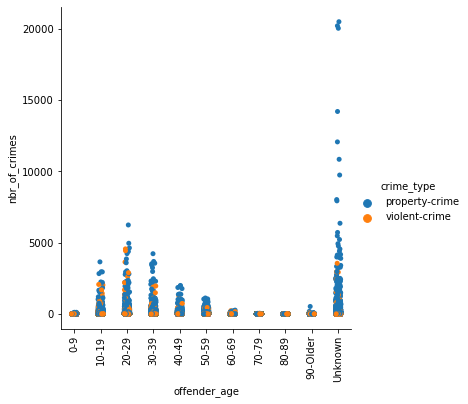

In [5]:
first_records_df = agency_crimes_age.head(129000)
g = sns.catplot(x="offender_age", y="nbr_of_crimes", hue= "crime_type", data=first_records_df)
g.set_xticklabels(rotation=90)

In [6]:
property_df = agency_crimes_age.loc[agency_crimes_age['crime_type']=='property-crime']
property_df.reset_index(drop=True)

,year,crime_type,agency,agency_name,county,state,state_name,latitude,longitude,total_crimes,offender_age,nbr_of_crimes
0,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,0-9,2
1,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,10-19,73
2,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,20-29,151
3,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,30-39,89
4,2017,property-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,550,40-49,67
...,...,...,...,...,...,...,...,...,...,...,...,...
67865,2017,property-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,70,60-69,0
67866,2017,property-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,70,70-79,0
67867,2017,property-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,70,80-89,0
67868,2017,property-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,70,90-Older,0


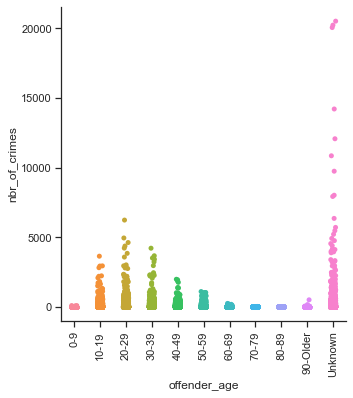

In [7]:
sns.set_theme(style="ticks", color_codes=True)
first_property_df = property_df.head(68000)
g = sns.catplot(x="offender_age", y="nbr_of_crimes", data=first_property_df)
g.set_xticklabels(rotation=90)

In [8]:
violent_df = agency_crimes_age.loc[agency_crimes_age['crime_type']=='violent-crime']
violent_df.reset_index(drop=True)

,year,crime_type,agency,agency_name,county,state,state_name,latitude,longitude,total_crimes,offender_age,nbr_of_crimes
0,2017,violent-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,105,0-9,2
1,2017,violent-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,105,10-19,32
2,2017,violent-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,105,20-29,30
3,2017,violent-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,105,30-39,14
4,2017,violent-crime,DE0030500,Milford Police Department,KENT; SUSSEX,DE,Delaware,38.916120,-75.42161,105,40-49,4
...,...,...,...,...,...,...,...,...,...,...,...,...
60297,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,60-69,1
60298,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,70-79,0
60299,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,80-89,0
60300,2017,violent-crime,TN0070100,Jellico Police Department,CAMPBELL,TN,Tennessee,36.586983,-84.13009,5,90-Older,0


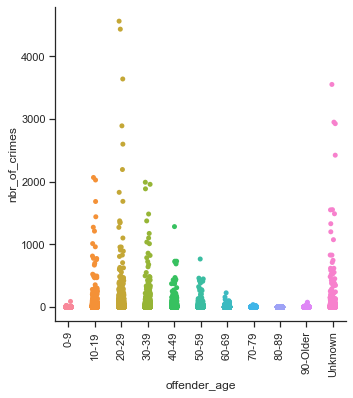

In [9]:
first_violent_df = violent_df.head(61000)
h = sns.catplot(x="offender_age", y="nbr_of_crimes", data=violent_df)
h.set_xticklabels(rotation=90)